HOUSE PRICE PREDICTION USING MACHINE LEARNING

In [1]:
import pandas as pd 
import os

In [2]:
train = pd.read_csv(r'C:\Users\Sanchali\Desktop\ARDENT\house-prices-csv\train.csv')
test = pd.read_csv(r'C:\Users\Sanchali\Desktop\ARDENT\house-prices-csv\test.csv')

In [3]:
print("The shape of train is ", train.shape)
print("The shape of test is ", test.shape)

The shape of train is  (1460, 81)
The shape of test is  (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df=pd.concat([train,test])
print("Shape of the merged dataset",df.shape)

Shape of the merged dataset (2919, 81)


In [7]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['SalePrice']])

SimpleImputer()

In [9]:
imputer.statistics_

array([180921.19589041])

In [10]:
df['SalePrice'] = imputer.transform(df[['SalePrice']]) 

In [11]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df = df.fillna(0)

In [13]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,57.766701,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,33.481636,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,56174.332503
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,43.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,163000.000000
50%,1460.000000,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,180921.195890
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,180921.195890
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_style('whitegrid')

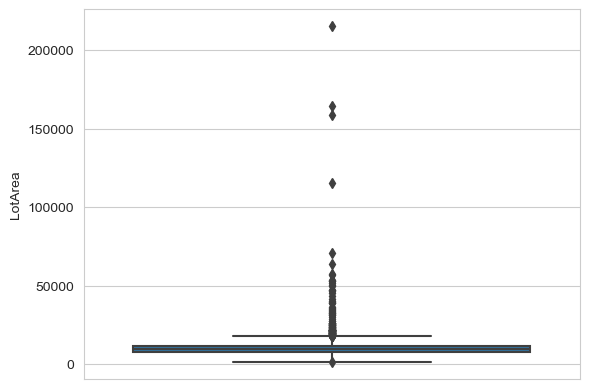

In [17]:
sns.boxplot(df, y = 'LotArea');

In [18]:
import numpy as np

In [19]:
Q1 = np.percentile(df['LotArea'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['LotArea'], 75, interpolation = 'midpoint')

In [20]:
IQR = Q3 - Q1

In [21]:
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

In [22]:
house_df = df[(df.LotArea < upperBound) & (df.LotArea > lowerBound)]

In [23]:
house_df.shape

(2791, 81)

In [24]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2791 non-null   int64  
 1   MSSubClass     2791 non-null   int64  
 2   MSZoning       2791 non-null   object 
 3   LotFrontage    2791 non-null   float64
 4   LotArea        2791 non-null   int64  
 5   Street         2791 non-null   object 
 6   Alley          2791 non-null   object 
 7   LotShape       2791 non-null   object 
 8   LandContour    2791 non-null   object 
 9   Utilities      2791 non-null   object 
 10  LotConfig      2791 non-null   object 
 11  LandSlope      2791 non-null   object 
 12  Neighborhood   2791 non-null   object 
 13  Condition1     2791 non-null   object 
 14  Condition2     2791 non-null   object 
 15  BldgType       2791 non-null   object 
 16  HouseStyle     2791 non-null   object 
 17  OverallQual    2791 non-null   int64  
 18  OverallCond  

In [25]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,RM,21.0,1526,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,0,0,6,2006,WD,Normal,180921.19589
1454,2915,160,RM,21.0,1936,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,180921.19589


In [26]:
cat_cols = house_df.select_dtypes('object').columns.tolist()

In [27]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
print(house_df[cat_cols].dtypes)

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [29]:
house_df.loc[:, cat_cols] = house_df[cat_cols].astype(str)

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(house_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [31]:
encoded_cols = encoder.get_feature_names_out(cat_cols)

In [32]:
encoded_cols

array(['MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
       'Alley_0', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood

In [33]:
house_df = house_df.join(pd.DataFrame(encoder.transform(house_df[cat_cols]), 
                                      columns=encoded_cols, 
                                      index=house_df.index), 
                                      rsuffix='_encoded')


In [34]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,2919,60,RL,74.0,9627,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,2919,60,RL,74.0,9627,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
house_df.drop(columns=cat_cols, inplace=True)

In [36]:
house_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
house_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [38]:
a = house_df.drop(columns = 'SalePrice')
b = house_df['SalePrice']

In [39]:
a

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(a)

MinMaxScaler()

In [41]:
a[:] = scaler.transform(a)

In [42]:
a

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.357143,0.430838,0.666667,0.500,0.949275,0.883333,0.12250,0.308566,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.000000,0.235294,0.357143,0.430838,0.666667,0.500,0.949275,0.883333,0.12250,0.308566,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.500343,0.000000,0.439560,0.626628,0.444444,0.625,0.644928,0.183333,0.00000,0.204545,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.500343,0.000000,0.439560,0.626628,0.444444,0.625,0.644928,0.183333,0.00000,0.204545,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000343,0.000000,0.439560,0.501821,0.555556,0.875,0.753623,0.433333,0.00000,0.427448,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,0.499657,0.000000,0.373626,0.509043,0.444444,0.625,0.565217,0.766667,0.00000,0.021416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.499657,0.000000,0.373626,0.509043,0.444444,0.625,0.565217,0.766667,0.00000,0.021416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.000000,0.235294,0.406593,0.503487,0.666667,0.500,0.876812,0.733333,0.05875,0.331294,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.000000,0.235294,0.406593,0.503487,0.666667,0.500,0.876812,0.733333,0.05875,0.331294,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [44]:
a_train.shape, a_test.shape, b_train.shape, b_test.shape

((4367, 304), (1092, 304), (4367,), (1092,))

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(a_train, b_train)

LinearRegression()

In [46]:
b_pred = model.predict(a_test)

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(b_test, b_pred)

282694967298.49677

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter=100, tol = 0.1)
lasso_reg.fit(a_train, b_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [49]:
lasso_pred = lasso_reg.predict(a_test)
mean_absolute_error(b_test, lasso_pred)

29676.550451362673

In [50]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1)
ridge_reg.fit(a_train, b_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [51]:
ridge_pred = ridge_reg.predict(a_test)
mean_absolute_error(b_test, ridge_pred)

29897.18618478753

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
import numpy as np
test_mse = mean_squared_error(b_test, b_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(b_test, b_pred)
test_mape = mean_absolute_percentage_error(b_test, b_pred)

print("Test Mean Squared Error (MSE):", test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Test R-squared (R²):", test_r2)
print("Test Mean Absolute Percentage Error (MAPE):",test_mape)

Test Mean Squared Error (MSE): 8.726873886015018e+25
Test Root Mean Squared Error (RMSE): 9341773860469.443
Test R-squared (R²): -3.252405526433539e+16
Test Mean Absolute Percentage Error (MAPE): 1562530.9569076104


In [54]:
!pip install xgboost

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(a_train, b_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
from sklearn.metrics import mean_absolute_error
b_pred = model.predict(a_test)
mean_absolute_error(b_test, b_pred)

4884.428413886876

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
test_mse = mean_squared_error(b_test, b_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(b_test, b_pred)
test_mape = mean_absolute_percentage_error(b_test, b_pred)

print("Test Mean Squared Error (MSE):", test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Test R-squared (R²):", test_r2)
print("Test Mean Absolute Percentage Error (MAPE):",test_mape)

Test Mean Squared Error (MSE): 90075754.46411413
Test Root Mean Squared Error (RMSE): 9490.824751522605
Test R-squared (R²): 0.9664298023045533
Test Mean Absolute Percentage Error (MAPE): 0.030434160881156483


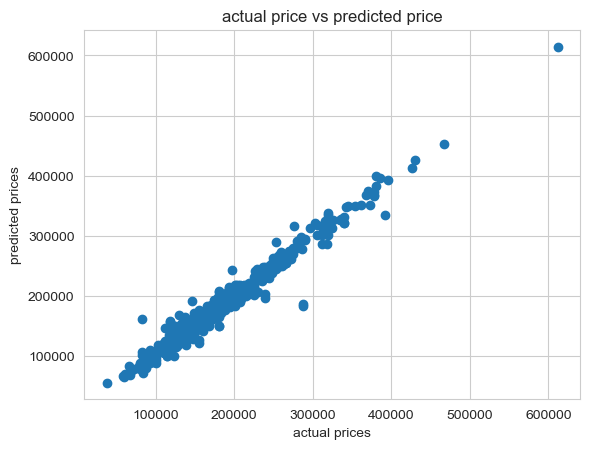

In [57]:
import matplotlib.pyplot as plt
plt.scatter(b_test,b_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual price vs predicted price")
plt.show()

In [59]:
from sklearn import svm
classifier = svm.SVR(kernel='linear')
classifier.fit(a_train, b_train)

SVR(kernel='linear')

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
predictions = classifier.predict(a_train)  
true_values = b_train  

mae = mean_absolute_error(true_values, predictions)
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)
mape = mean_absolute_percentage_error(true_values, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Test Mean Absolute Percentage Error (MAPE):",mape)

Mean Absolute Error (MAE): 28141.600456835968
Mean Squared Error (MSE): 2923974703.895989
R-squared (R2): -5.8960735285884525e-05
Test Mean Absolute Percentage Error (MAPE): 0.18395503174227124


In [61]:
from sklearn.ensemble import RandomForestRegressor
clf= RandomForestRegressor(n_estimators=100)
clf.fit(a_train,b_train)

RandomForestRegressor()

In [62]:
b_pred = clf.predict(a_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(b_test, b_pred)
mse = mean_squared_error(b_test, b_pred)
rmse = mean_squared_error(b_test, b_pred, squared=False)  
r2 = r2_score(b_test, b_pred)
mape = mean_absolute_percentage_error(b_test, b_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Test Mean Absolute Percentage Error (MAPE):",mape)

Mean Absolute Error (MAE): 5247.7136817960245
Mean Squared Error (MSE): 118602281.79527333
Root Mean Squared Error (RMSE): 10890.4674736796
R-squared (R2): 0.9557982936619795
Test Mean Absolute Percentage Error (MAPE): 0.031533970920125595


In [65]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
xgb = XGBRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(xgb, a_train, b_train, scoring='neg_mean_absolute_percentage_error', cv=kf)

print('Mean Absolute Percentage Error (MAPE):', -results.mean())
print('Standard Deviation of MAPE:', results.std())


Mean Absolute Percentage Error (MAPE): 0.03661964438048647
Standard Deviation of MAPE: 0.0023135924636433496
